# Graphs

## Homework #16 by Glaktionova Natalia

VK API

## Знакомство с данными

In [86]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import networkx as nx
import time
import collections

Соберем данные по моим группам

In [ ]:
group_url = 'https://api.vk.com/method/groups.get?user_id={}&extended=1&v=5.103&access_token=xxx' 
json_response = requests.get(group_url.format(47950733)).json()
if json_response.get('error'):
    print (json_response.get('error'))


In [58]:
groups = json_response[u'response']['items']

In [80]:
groups_out = {}
for group in groups:
    group_url = 'https://api.vk.com/method/groups.getMembers?group_id={}&offset=100&count=10&v=5.103&access_token=xxx' 
    json_response = requests.get(group_url.format(group['id'])).json()
    try:
        groups_out[group['id']] = json_response['response']
    except:
        print (json_response.get('error'))
        
    time.sleep(1)


{'error_code': 15, 'error_msg': 'Access denied: group hide members', 'request_params': [{'key': 'group_id', 'value': '30666517'}, {'key': 'offset', 'value': '100'}, {'key': 'count', 'value': '10'}, {'key': 'v', 'value': '5.103'}, {'key': 'method', 'value': 'groups.getMembers'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 15, 'error_msg': 'Access denied: group hide members', 'request_params': [{'key': 'group_id', 'value': '48601180'}, {'key': 'offset', 'value': '100'}, {'key': 'count', 'value': '10'}, {'key': 'v', 'value': '5.103'}, {'key': 'method', 'value': 'groups.getMembers'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 15, 'error_msg': 'Access denied: group hide members', 'request_params': [{'key': 'group_id', 'value': '73400119'}, {'key': 'offset', 'value': '100'}, {'key': 'count', 'value': '10'}, {'key': 'v', 'value': '5.103'}, {'key': 'method', 'value': 'groups.getMembers'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 15, 'error_msg': 'Access denied: group hide membe

Построим по полученным данным граф

In [102]:
graph = nx.Graph()
groups_out_it = groups_out.items()

In [103]:
for i_group in range(len(groups_out_it)):
    graph.add_node(list(groups_out_it)[i_group][0], size=list(groups_out_it)[i_group][1]['count'])
    for k_group in range(i_group+2, len(groups_out_it)):
        intersection = set(list(groups_out_it)[i_group][1]['items']).intersection(set(list(groups_out_it)[k_group][1]['items']))
        if len(intersection) > 0:
            graph.add_edge(list(groups_out_it)[i_group][0], list(groups_out_it)[k_group][0], weight=len(intersection))

In [118]:
graph.number_of_nodes()

153

In [119]:
graph.number_of_edges()

30

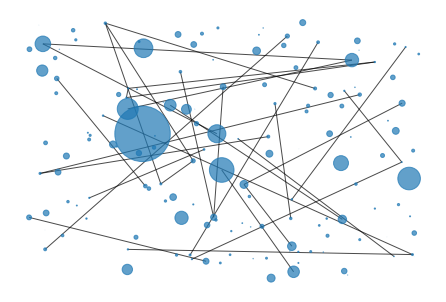

In [148]:
nx.draw_random(graph, with_labels=False, alpha=0.7, node_size = [n[1]['size']/1000 for n in graph.nodes.data()])

In [197]:
def search(id, group):
    elm = [element for element in group if element['id'] == id]
    return elm[0]['name']

**Степень посредничества**

In [212]:
from collections import Counter
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print('{0:50}  {1}'.format(search(k, groups), v))

Программирование ITmozg:                            0.0001742767514813524
AUDIOBOOKS, BOOKS★The Economist★BBC ★ Аудиокниги    0.0001742767514813524
Французский. Языковые и культурные открытия         0.0001742767514813524
Новинки кино с русскими субтитрами                  8.71383757406762e-05
Испанский Язык и Испания                            8.71383757406762e-05
Немецкий язык | DeutschEffekt | Школа Д.Листвина    8.71383757406762e-05
Audiolibros / Аудиокниги на испанском               8.71383757406762e-05
BRitaly | English and Italian                       8.71383757406762e-05
Интеллектуальный юмор                               0.0
Алена Митрофанова - рецепты                         0.0


**Показатель центральности**

In [213]:
degree_centrality = nx.degree_centrality(graph)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print('{0:50}  {1}'.format(search(k, groups), v))

Французский. Языковые и культурные открытия         0.019736842105263157
Программирование ITmozg:                            0.013157894736842105
AUDIOBOOKS, BOOKS★The Economist★BBC ★ Аудиокниги    0.013157894736842105
Cacao de idiomas                                    0.013157894736842105
Glutton for languages                               0.013157894736842105
Английский язык/English/Иностранные языки           0.013157894736842105
Новинки кино с русскими субтитрами                  0.013157894736842105
Испанский Язык и Испания                            0.013157894736842105
Немецкий язык | DeutschEffekt | Школа Д.Листвина    0.013157894736842105
Multilingua blog                                    0.013157894736842105


**Степень близости**

In [214]:
closeness_centrality = nx.closeness_centrality(graph)
closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print('{0:50}  {1}'.format(search(k, groups), v))

Французский. Языковые и культурные открытия         0.019736842105263157
Программирование ITmozg:                            0.014802631578947368
AUDIOBOOKS, BOOKS★The Economist★BBC ★ Аудиокниги    0.014802631578947368
Multilingua blog                                    0.014802631578947368
The readers page. Le coin des lecteurs.             0.014802631578947368
Cacao de idiomas                                    0.013157894736842105
Glutton for languages                               0.013157894736842105
Английский язык/English/Иностранные языки           0.013157894736842105
Новинки кино с русскими субтитрами                  0.013157894736842105
Испанский Язык и Испания                            0.013157894736842105
